c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6596332095691734
300
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


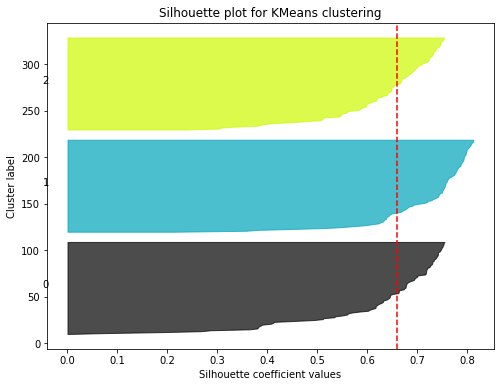

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data
n_samples = 300
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.60, random_state=0)

# Fit KMeans clustering model
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# Calculate silhouette scores
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)

clusterer1 = AgglomerativeClustering().fit(X)
sample_silhouette_values = silhouette_samples(X, cluster_labels)
print(len(sample_silhouette_values))
# Create a subplot with 1 row and 1 column
plt.figure(figsize=(8, 6))
ax1 = plt.subplot(1, 1, 1)

# Set the range of y-axis for individual silhouette plots
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    print(type(ith_cluster_silhouette_values))

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette plot for KMeans clustering")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()
